In [1]:
import numpy as np
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from df2gspread import df2gspread as d2g

In [2]:
def init_credentials():
    global scope,path,credentials,gc,key
    scope = ['https://spreadsheets.google.com/feeds',
             'https://www.googleapis.com/auth/drive']
    
    path = '/Users/MichaelRubsamen/Downloads/Jupyter_Notebooks/Research/JSON/hendricks-lab-jupyter-sheets-5363dda1a7e0.json'
    credentials = ServiceAccountCredentials.from_json_keyfile_name(path, scope) # Your json file here
    key = input('What is your spreadsheet key? ')
    gc = gspread.authorize(credentials)
    return scope,path,credentials,gc

def pre_rxn_questions():   
    global reaction_sheet_name,key
    reaction_sheet_name = input('Enter Sheet Name as it Appears on the Spreadsheets Title: ')
    init_credentials()
    try:
        wks = gc.open(reaction_sheet_name)
        print('Everythings Ready To Go')
    except: 
        raise Exception('Spreadsheet Not Found: Make sure the spreadsheet name is spelled correctly and that it is shared with the robot ')
    
    
pre_rxn_questions() 
    
def initialize(file,*args):
    global df
    try:
        for i in args:
            sheet = i
    except: 
        sheet = input('Input Sheet Name: ')
    wks = gc.open(file)
    wks = wks.worksheet(sheet)
    data = wks.get_all_values()
    df = pd.DataFrame(data)
    header = df.iloc[0]
    df = df[1:]
    rxn_titles = header[3:].tolist()
    for i in range(len(rxn_titles)):
        rxn_titles[i] = reaction_sheet_name + ': ' + rxn_titles[i]
    df.columns = header
    return df 
initialize(reaction_sheet_name,'pchem_week8_catalysis_Well_Map')



Enter Sheet Name as it Appears on the Spreadsheets Title: pchem_week8_catalysis
What is your spreadsheet key? 
Everythings Ready To Go


0  Spectrometer Well                         Rxn Title
1                A01  pchem_week8_catalysis: HWM 8.33c
2                B01  pchem_week8_catalysis: HWM 8.38c
3                C01  pchem_week8_catalysis: HWM 8.39c
4                D01  pchem_week8_catalysis: HWM 8.40c
5                E01    pchem_week8_catalysis: MK_8.1c
6                F01    pchem_week8_catalysis: MK_8.2c
7                G01    pchem_week8_catalysis: MK_8.7c
8                H01    pchem_week8_catalysis: MK_8.4c
9                A02  pchem_week8_catalysis: HWM 8.37c
10               B02  pchem_week8_catalysis: HWM 8.34c
11               C02  pchem_week8_catalysis: HWM 8.36c
12               D02  pchem_week8_catalysis: HWM 8.37c
13               E02    pchem_week8_catalysis: MK_8.8c
14               F02    pchem_week8_catalysis: MK_8.6c
15               G02    pchem_week8_catalysis: MK_8.3c
16               H02    pchem_week8_catalysis: MK_8.5c

In [3]:
well_key = {}
def update_dict(df,well_key):
    well_key.update(dict(zip(df['Spectrometer Well'], df['Rxn Title'])))
    return well_key

In [4]:
#initialize(reaction_sheet_name,'pchem_week_Well_Map')
update_dict(df,well_key)
df_reorder = list(well_key.keys())
df_reorder

['A01',
 'B01',
 'C01',
 'D01',
 'E01',
 'F01',
 'G01',
 'H01',
 'A02',
 'B02',
 'C02',
 'D02',
 'E02',
 'F02',
 'G02',
 'H02']

In [6]:
#datafilename = "MSK_013_200929_plate.csv"
df_list = []
blank = pd.read_pickle("./Spectrometer_Blank.pkl")
temp = blank[:701]
i = 0
while i < 50:
    blank = blank.append(temp)
    i += 1
blank = blank.to_frame()
blank['B'] = blank['A01:']
blank['C'] = blank['A01:']
blank['D'] = blank['A01:']
blank['E'] = blank['A01:']
blank['F'] = blank['A01:']
blank['G'] = blank['A01:']
blank['H'] = blank['A01:']
datafilenameA = 'pchem_week8_catalysis_rowA.csv'
df_workup(datafilenameA,df_list)
datafilenameB = 'pchem_week8_catalysis_rowB.csv'
df_workup(datafilenameB,df_list)
datafilenameC = 'pchem_week8_catalysis_rowC.csv'
df_workup(datafilenameC,df_list)

datafilenameD = 'pchem_week8_catalysis_rowD.csv'
df_workup(datafilenameD,df_list)

datafilenameE = 'pchem_week8_catalysis_rowE.csv'
df_workup(datafilenameE,df_list)

datafilenameF = 'pchem_week8_catalysis_rowF.csv'
df_workup(datafilenameF,df_list)

datafilenameG = 'pchem_week8_catalysis_rowG.csv'
df_workup(datafilenameG,df_list)

datafilenameH = 'pchem_week8_catalysis_rowH.csv'
df_workup(datafilenameH,df_list)

print(df_list,'df_list')


0       A01:   A02:
1      0.598  0.609
2      0.554  0.566
3      0.515  0.526
4      0.482  0.492
5      0.454  0.464
...      ...    ...
42056  0.134  0.131
42057  0.133  0.131
42058  0.131  0.129
42059  0.131  0.128
42060  0.128  0.126

[42060 rows x 2 columns]
['A01', 'A02']
0       B01:   B02:
1      0.616  0.634
2      0.571  0.590
3      0.531  0.550
4      0.497  0.516
5      0.468  0.486
...      ...    ...
42056  0.133  0.136
42057  0.134  0.135
42058  0.131  0.131
42059  0.129  0.131
42060  0.129  0.129

[42060 rows x 2 columns]
['B01', 'B02']
0       C01:   C02:
1      0.618  0.594
2      0.574  0.550
3      0.534  0.511
4      0.501  0.479
5      0.471  0.451
...      ...    ...
42056  0.134  0.133
42057  0.132  0.133
42058  0.132  0.132
42059  0.130  0.131
42060  0.128  0.130

[42060 rows x 2 columns]
['C01', 'C02']
0       D01:   D02:
1      0.629  0.617
2      0.583  0.572
3      0.543  0.533
4      0.509  0.499
5      0.478  0.469
...      ...    ...
42056  0.130  0.1

In [ ]:
df_list[5]

In [7]:
master_df = pd.concat(df_list,axis = 1)

In [8]:
master_df

A01    A02    B01    B02    C01    C02    D01    D02    E01    E02  \
1      0.598  0.609  0.616  0.634  0.618  0.594  0.629  0.617  0.643  0.653   
2      0.554  0.566  0.571  0.590  0.574  0.550  0.583  0.572  0.598  0.609   
3      0.515  0.526  0.531  0.550  0.534  0.511  0.543  0.533  0.558  0.569   
4      0.482  0.492  0.497  0.516  0.501  0.479  0.509  0.499  0.523  0.533   
5      0.454  0.464  0.468  0.486  0.471  0.451  0.478  0.469  0.494  0.505   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
42056  0.134  0.131  0.133  0.136  0.134  0.133  0.130  0.132  0.132  0.131   
42057  0.133  0.131  0.134  0.135  0.132  0.133  0.129  0.131  0.130  0.131   
42058  0.131  0.129  0.131  0.131  0.132  0.132  0.128  0.129  0.129  0.129   
42059  0.131  0.128  0.129  0.131  0.130  0.131  0.127  0.127  0.128  0.128   
42060  0.128  0.126  0.129  0.129  0.128  0.130  0.125  0.127  0.127  0.126   

         F01    F02    G01    G02    H01    H02  
1      0.637  0.607  0.627  0.629  0.623  0.646  
2      0.592  0.565  0.581  0.583  0.577  0.601  
3      0.551  0.527  0.541  0.544  0.538  0.560  
4      0.517  0.493  0.506  0.510  0.504  0.525  
5      0.486  0.464  0.477  0.481  0.475  0.494  
...      ...    ...    ...    ...    ...    ...  
42056  0.128  0.131  0.125  0.128  0.128  0.128  
42057  0.127  0.131  0.125  0.129  0.126  0.127  
42058  0.127  0.129  0.124  0.128  0.125  0.124  
42059  0.126  0.129  0.121  0.124  0.124  0.124  
42060  0.124  0.126  0.121  0.124  0.124  0.123  

[42060 rows x 16 columns]

In [10]:
master_df.columns

Index(['A01', 'A02', 'B01', 'B02', 'C01', 'C02', 'D01', 'D02', 'E01', 'E02',
       'F01', 'F02', 'G01', 'G02', 'H01', 'H02'],
      dtype='object')

In [ ]:
#master_df = master_df.sub(blank,axis = 0)
master_df.columns = all_headers
master_df

In [ ]:
master_df = master_df - blank
master_df

In [ ]:
datafilenameA = 'pchem_week8_catalysis_rowC.csv'

df_workup(datafilenameA)
df_workup(datafilenameB)
'''datafilenameC = 'pchem_week8_catalysis_rowC.csv'
c = df_workup(datafilenameC)
df_list.append(c)
datafilenameD = 'pchem_week8_catalysis_rowD.csv'
d = df_workup(datafilenameD)
df_list.append(d)
datafilenameE = 'pchem_week8_catalysis_rowE.csv'
e = df_workup(datafilenameE)
df_list.append(e)
datafilenameF = 'pchem_week8_catalysis_rowF.csv'
f = df_workup(datafilenameF)
df_list.append(f)
datafilenameG = 'pchem_week8_catalysis_rowG.csv'
g = df_workup(datafilenameG)
df_list.append(g)
datafilenameH = 'pchem_week8_catalysis_rowH.csv'
h = df_workup(datafilenameH)
df_list.append(h)'''
#master_df = pd.concat(df_list,axis = 1)

In [ ]:
master_df

In [ ]:
data = [datafilenameA,datafilenameB,datafilenameC,datafilenameD,
       datafilenameE,datafilenameF,datafilenameG,datafilenameH]
blank.info()

In [5]:
all_headers = []
def df_workup(datafilename,df_list):
    # Read data ignoring first 50 lines
    df = pd.read_csv(datafilename,skiprows=50,header=None,na_values=["       -"],encoding = 'latin1')
    # Transpose the data making each plate a column
    df = df.transpose()
    # Fix the index column
    df = df.reset_index()
    # Fix the column headers, make plate names column names
    headers = df.iloc[0,:]
    # Drop the detector label row
    df.columns = headers
    headers = headers[1:]
    headers = [x[:-1] for x in headers]
    all_headers.extend(headers)
    df = df.drop([0])
    df = df.drop(columns=[0])
    df = df.dropna()
    df = df.astype(float)
    #df = df.iloc[:,5:]
    print(df)
    #df = df.sub(blank,axis = 0)
    df.columns = headers
    df_list.append(df)
    print(headers)
    return df


In [ ]:
df_list = list(map(df_workup,data))
df_list

In [ ]:
df = pd.concat(df_list, axis=1)
df

In [ ]:
df.info()

In [53]:
df = master_df
for col in df.columns:
    try:
        well_key[col]
        print('Yes')
    except:
        print('no',col)
        #del df[col]
        continue # doing nothing on exception
headers = df.columns
print('headers',headers)
print(headers)

Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
headers Index(['A01', 'A02', 'B01', 'B02', 'C01', 'C02', 'D01', 'D02', 'E01', 'E02',
       'F01', 'F02', 'G01', 'G02', 'H01', 'H02'],
      dtype='object')
Index(['A01', 'A02', 'B01', 'B02', 'C01', 'C02', 'D01', 'D02', 'E01', 'E02',
       'F01', 'F02', 'G01', 'G02', 'H01', 'H02'],
      dtype='object')


In [ ]:
print(df.columns)
print(df_reorder)
df = df[df_reorder]
headers = df.columns
df

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_setup_overlay(name):
    plt.figure(num=None, figsize=(4, 4),dpi=300, facecolor='w', edgecolor='k')
    plt.legend(loc="upper right",frameon = False, prop={"size":7},labelspacing = 0.5)
    plt.rc('axes', linewidth = 2)
    plt.xlabel('Wavelength (nm)',fontsize = 16, fontfamily = 'Arial',fontname="Arial")
    plt.ylabel('Absorbance (a.u.)', fontsize = 16,fontname="Arial")
    plt.tick_params(axis = "both", width = 2)
    plt.tick_params(axis = "both", width = 2)
    plt.xticks([300,400,500,600,700,800,900,1000])
    plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    #plt.ylims = ([0,1.0])
    plt.axis([300, 1000, 0.0 , 1.0])
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.title(str(name) + reaction_sheet_name, fontsize = 16, pad = 20,fontname="Arial")
    #return x
    


def overlay(df):
    y = []
    df = df[df_reorder]
    headers = df.columns
    #legend_colors = []
    for j in range(df.shape[1]):
        temp = df.iloc[:,j].tolist()
        y.append(temp[-701:])
    plot_setup_overlay('Overlay: ')
    print(len(y))
    colors = list(cm.rainbow(np.linspace(0, 1,len(y))))
    print(type(colors),len(colors),len(y),colors[0])
    for i in range(len(y)):
        plt.plot(x_vals,y[i],color = tuple(colors[i]))
    plt.figure()
    patches = [mpatches.Patch(color=color, label=label) for label, color in zip(headers, colors)]
    plt.legend(patches, headers, loc='center', frameon=False)
    legend = pd.DataFrame({'Color':patches,
                           'Labels': headers})
   # print(legend,'LEGEND')
    plt.show()
    
overlay(df)


In [12]:
def calc_cycles(df):
    global cycles
    cycles = int(df.shape[0]/701)

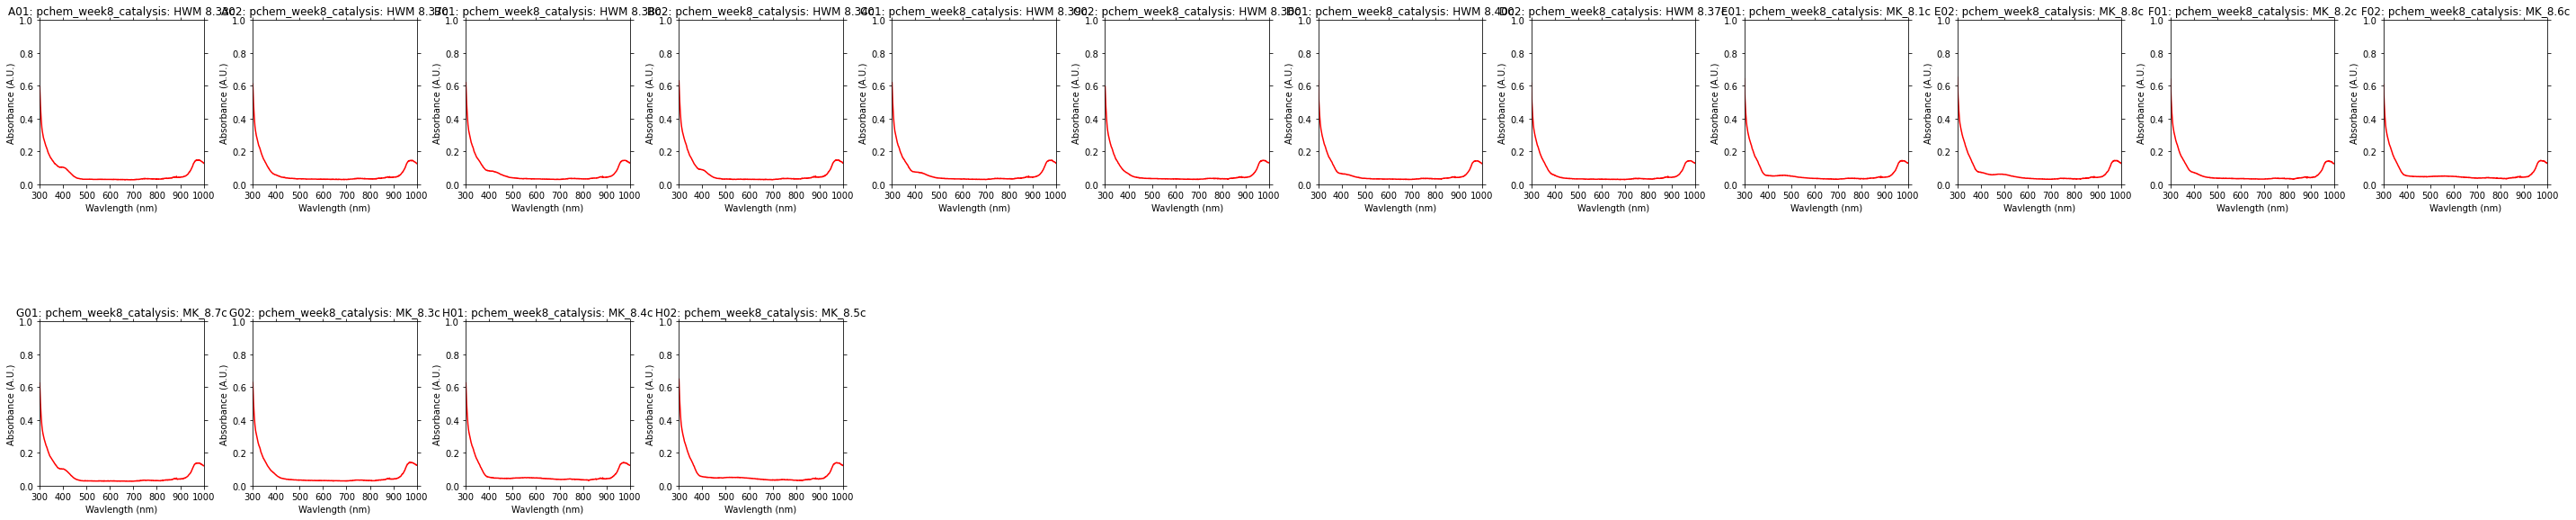

In [13]:
import matplotlib.pyplot as plt

global x_val,dummy
x_vals,dummy = [],[0]
i = 300
while i <= 1000:
    x_vals.append(i)
    i += 1
dummy = dummy * 701

def ind_subplots(df):
    df = df.tail(701)
    fig, axes = plt.subplots(8, 12, figsize=(50, 50),subplot_kw=dict(box_aspect=1))
                              #,sharex = True,sharey = True)
    for idx, (col, ax) in enumerate(zip(df.columns, axes.flatten())):
        try:
            ax.set_title(col + ": " + well_key[col])
            ax.plot(x_vals, df[col],color = 'red')
        except:
            ax.plot(x_vals,dummy,color = 'red')
            ax.set_title('NOT DATA')
        #plt.title(str(name) + well_key[name])
        plt.subplots_adjust(wspace=0.3, hspace= -0.1)
    
        ax.tick_params(
            which='both',
            bottom='off',
            left='off',
            right='off',
            top='off'
        )
        ax.set_xlim((300,1000))
        ax.set_ylim((0,1.0))
        ax.set_xlabel("Wavlength (nm)")
        ax.set_ylabel("Absorbance (A.U.)")
        ax.set_xticks(range(300, 1100, 100))
        #ax.set_aspect(adjustable='box')
        #ax.set_yticks(range(0,1))
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]
ind_subplots(df)

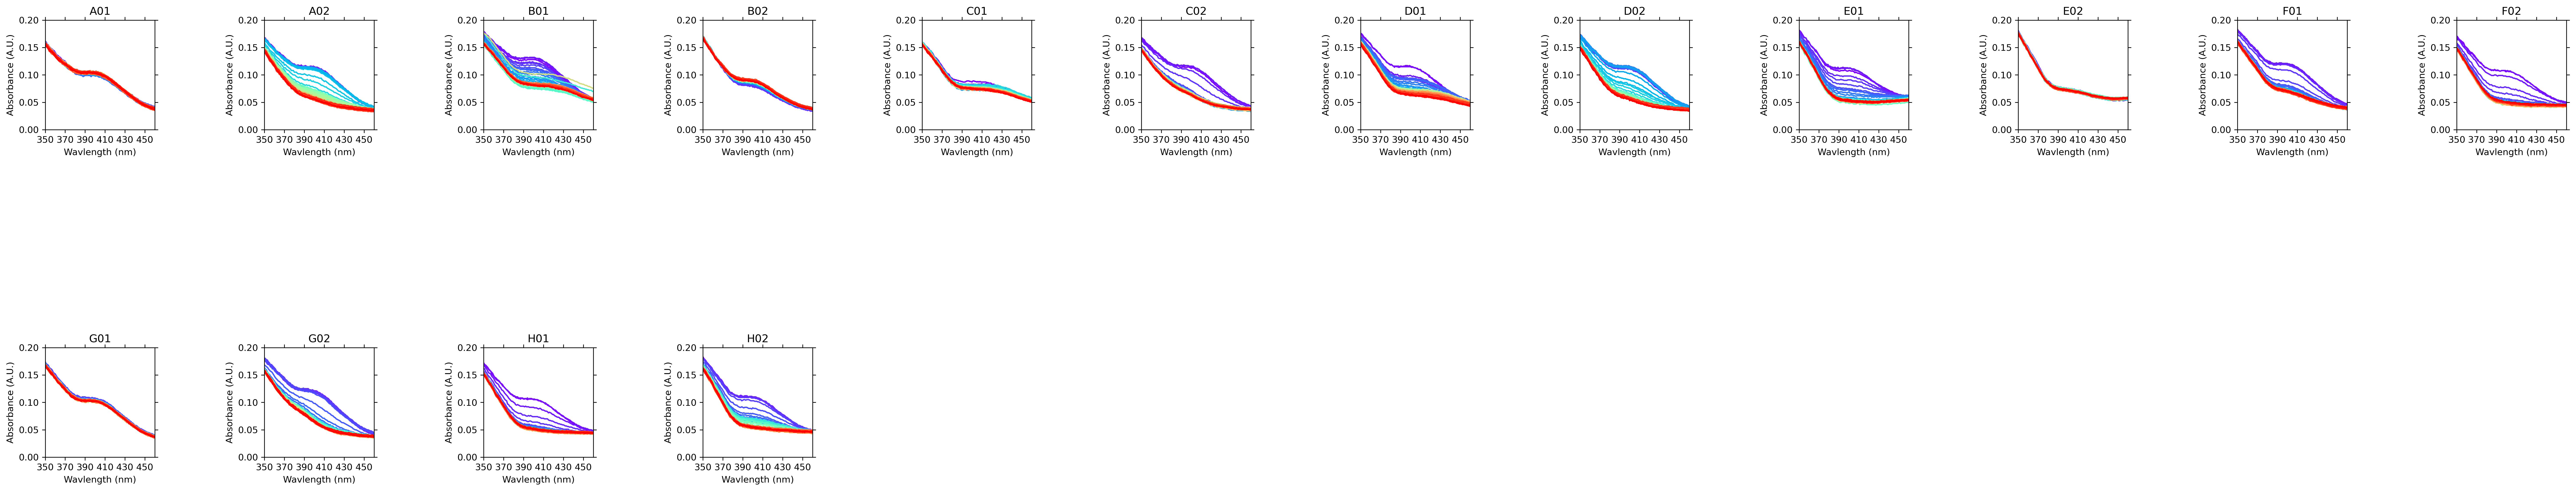

In [72]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def kinetics_subplots(df):
    calc_cycles(df)
    colors = list(cm.rainbow(np.linspace(0, 1, cycles)))
    fig, axes = plt.subplots(8, 12, dpi=300, figsize=(50, 50),subplot_kw=dict(box_aspect=1))
                              #,sharex = True,sharey = True)
    for idx, (col, ax) in enumerate(zip(df.columns, axes.flatten())):
        try:
            ax.set_title(col)
            kin = 0
            temp = df[col].tolist()
            while kin != cycles:
                ax.plot(x_vals, temp[:701], color = tuple(colors[kin]))
                del temp[:701]
                kin +=1
        except:
            ax.plot(x_vals,dummy,color = 'red')
            ax.set_title('NOT DATA')
        plt.subplots_adjust(wspace = 1.0, hspace= 1.0)
    
        ax.tick_params(
            which='both',
            bottom='off',
            left='off',
            right='off',
            top='off'
        )
        ax.set_xlim((350,460))
        ax.set_ylim((0,0.2))
        ax.set_xlabel("Wavlength (nm)")
        ax.set_ylabel("Absorbance (A.U.)")
        ax.set_xticks(range(350, 460, 20))
        #ax.set_aspect(adjustable='box')
        #ax.set_yticks(range(0,1))
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]
kinetics_subplots(df)

In [64]:
ls = []
x = 300
while x != 1001:
    ls.append(x)
    x+=1
#print(ls,len(ls))
ls[700]

1000

yes
[0.102, 0.106, 0.102, 0.10099999999999999, 0.1, 0.1, 0.10300000000000001, 0.10099999999999999, 0.098, 0.10099999999999999, 0.102, 0.10099999999999999, 0.102, 0.10099999999999999, 0.099, 0.10099999999999999, 0.10099999999999999, 0.1, 0.10099999999999999, 0.10300000000000001, 0.102, 0.105, 0.10400000000000001, 0.10300000000000001, 0.10099999999999999, 0.10300000000000001, 0.10300000000000001, 0.10300000000000001, 0.10400000000000001, 0.102, 0.10099999999999999, 0.10300000000000001, 0.10400000000000001, 0.105, 0.105, 0.10400000000000001, 0.10400000000000001, 0.102, 0.10300000000000001, 0.10400000000000001, 0.105, 0.10300000000000001, 0.106, 0.10300000000000001, 0.10300000000000001, 0.10400000000000001, 0.10300000000000001, 0.10400000000000001, 0.105, 0.105, 0.10400000000000001, 0.106, 0.10099999999999999, 0.106, 0.10400000000000001, 0.10400000000000001, 0.105, 0.10300000000000001, 0.105, 0.10300000000000001]
yes
[0.114, 0.115, 0.11199999999999999, 0.113, 0.114, 0.113, 0.114, 0.1119999

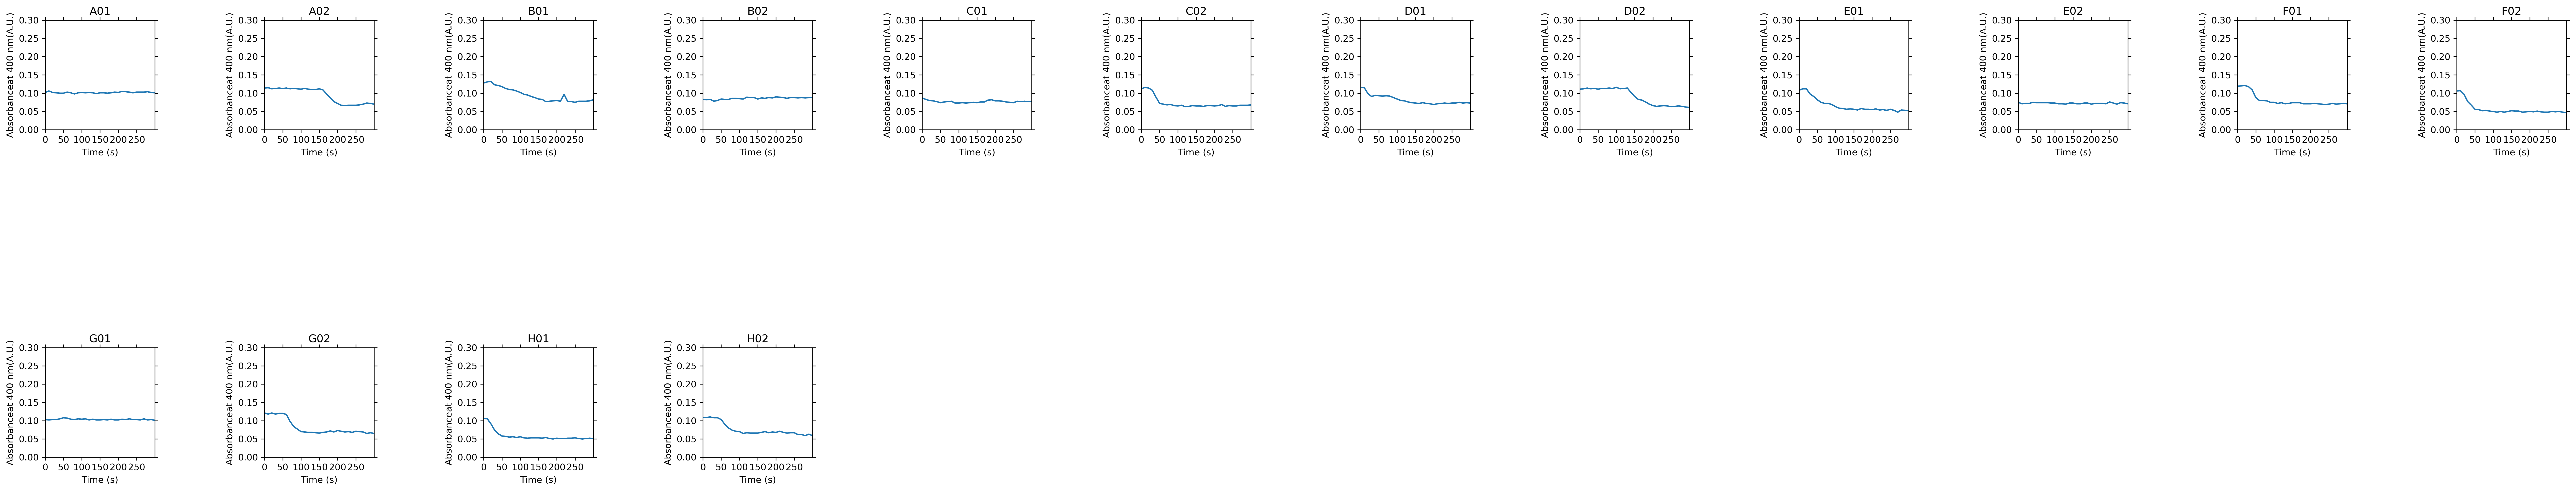

In [74]:
def kinetics_timeplots(df,scan_time,wavlng):
    calc_cycles(df)
    wavlng = wavlng - 300
    #colors = list(cm.rainbow(np.linspace(0, 1, cycles)))
    fig, axes = plt.subplots(8, 12, dpi=300, figsize=(50, 50),subplot_kw=dict(box_aspect=1))
    x = []                         #,sharex = True,sharey = True) 
    for idx, (col, ax) in enumerate(zip(df.columns, axes.flatten())):
        try:
            print('yes')
            ax.set_title(col)
            y = []
            kin = 0
            time = 0
            well = df[col].tolist()
            while kin != cycles:
                temp = well[:701]
                #print(len(temp))
                #print(len(well))
                #print(temp[wavlng])
                y.append(temp[wavlng])
                if len(x) != cycles:
                    x.append(time)
                    time += scan_time
                del well[:701]
                kin +=1
            ax.plot(x,y)
            print(y)
        except:
            print('no')
            ax.plot(x_vals,dummy,color = 'red')
            ax.set_title('NOT DATA')
        plt.subplots_adjust(wspace = 1.0, hspace= 1.0)
    
        ax.tick_params(
            which='both',
            bottom='off',
            left='off',
            right='off',
            top='off'
        )
        ax.set_xlim((0,300))
        ax.set_ylim((0,0.3))
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Absorbance" + "at " + str(wavlng + 300) + " nm" "(A.U.)")
        ax.set_xticks(range(0, 300, 50))
        #ax.set_aspect(adjustable='box')
        #ax.set_yticks(range(0,1))
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]
kinetics_timeplots(df,10,400)

In [44]:
print(df.columns)

Index(['A01', 'A02', 'B01', 'B02', 'C01', 'C02', 'D01', 'D02', 'E01', 'E02',
       'F01', 'F02', 'G01', 'G02', 'H01', 'H02'],
      dtype='object')


In [33]:
df['A01'][800]

0.105

In [46]:
df

A01    A02    B01    B02    C01    C02    D01    D02    E01    E02  \
1      0.598  0.609  0.616  0.634  0.618  0.594  0.629  0.617  0.643  0.653   
2      0.554  0.566  0.571  0.590  0.574  0.550  0.583  0.572  0.598  0.609   
3      0.515  0.526  0.531  0.550  0.534  0.511  0.543  0.533  0.558  0.569   
4      0.482  0.492  0.497  0.516  0.501  0.479  0.509  0.499  0.523  0.533   
5      0.454  0.464  0.468  0.486  0.471  0.451  0.478  0.469  0.494  0.505   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
42056  0.134  0.131  0.133  0.136  0.134  0.133  0.130  0.132  0.132  0.131   
42057  0.133  0.131  0.134  0.135  0.132  0.133  0.129  0.131  0.130  0.131   
42058  0.131  0.129  0.131  0.131  0.132  0.132  0.128  0.129  0.129  0.129   
42059  0.131  0.128  0.129  0.131  0.130  0.131  0.127  0.127  0.128  0.128   
42060  0.128  0.126  0.129  0.129  0.128  0.130  0.125  0.127  0.127  0.126   

         F01    F02    G01    G02    H01    H02  
1      0.637  0.607  0.627  0.629  0.623  0.646  
2      0.592  0.565  0.581  0.583  0.577  0.601  
3      0.551  0.527  0.541  0.544  0.538  0.560  
4      0.517  0.493  0.506  0.510  0.504  0.525  
5      0.486  0.464  0.477  0.481  0.475  0.494  
...      ...    ...    ...    ...    ...    ...  
42056  0.128  0.131  0.125  0.128  0.128  0.128  
42057  0.127  0.131  0.125  0.129  0.126  0.127  
42058  0.127  0.129  0.124  0.128  0.125  0.124  
42059  0.126  0.129  0.121  0.124  0.124  0.124  
42060  0.124  0.126  0.121  0.124  0.124  0.123  

[42060 rows x 16 columns]

In [84]:
i=blank.shape[0]
while i < df.shape[0]:
    blank[i] = 0
    i+= 1

In [104]:
new

1      0.623
2      0.577
3      0.536
4      0.501
5      0.470
       ...  
697    0.118
698    0.118
699    0.115
700    0.115
701    0.115
Name: A01:, Length: 42060, dtype: float64

In [108]:
df.to_csv('catalysis_week8.csv')

In [109]:
blank.to_csv('catalysis_blank.csv')